In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

The initial data file chronic_kidney_disease.arff won't load because it has a few problems. <a href='http://stackoverflow.com/questions/62653514'>This link</a> shows how to fix the file and load it into a dataframe

In [2]:
# Loading data
from scipy.io.arff import loadarff 

raw_data = loadarff('chronic_kidney_disease_fixed.arff')
df = pd.DataFrame(raw_data[0])
# A more understandable column names
df.columns = ['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria', 'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Class']

# Fixing the data 

### Looking into the issues we have with our data

In [3]:
df

Age  Blood Pressure Specific Gravity Albumin Sugar Red Blood Cells  \
0    48.0            80.0         b'1.020'    b'1'  b'0'            b'?'   
1     7.0            50.0         b'1.020'    b'4'  b'0'            b'?'   
2    62.0            80.0         b'1.010'    b'2'  b'3'       b'normal'   
3    48.0            70.0         b'1.005'    b'4'  b'0'       b'normal'   
4    51.0            80.0         b'1.010'    b'2'  b'0'       b'normal'   
..    ...             ...              ...     ...   ...             ...   
395  55.0            80.0         b'1.020'    b'0'  b'0'       b'normal'   
396  42.0            70.0         b'1.025'    b'0'  b'0'       b'normal'   
397  12.0            80.0         b'1.020'    b'0'  b'0'       b'normal'   
398  17.0            60.0         b'1.025'    b'0'  b'0'       b'normal'   
399  58.0            80.0         b'1.025'    b'0'  b'0'       b'normal'   

        Pus Cell Pus Cell Clumps       Bacteria  Blood Glucose Random  ...  \
0      b'normal'   b'notpresent'  b'notpresent'                 121.0  ...   
1      b'normal'   b'notpresent'  b'notpresent'                   NaN  ...   
2      b'normal'   b'notpresent'  b'notpresent'                 423.0  ...   
3    b'abnormal'      b'present'  b'notpresent'                 117.0  ...   
4      b'normal'   b'notpresent'  b'notpresent'                 106.0  ...   
..           ...             ...            ...                   ...  ...   
395    b'normal'   b'notpresent'  b'notpresent'                 140.0  ...   
396    b'normal'   b'notpresent'  b'notpresent'                  75.0  ...   
397    b'normal'   b'notpresent'  b'notpresent'                 100.0  ...   
398    b'normal'   b'notpresent'  b'notpresent'                 114.0  ...   
399    b'normal'   b'notpresent'  b'notpresent'                 131.0  ...   

     Packed Cell Volume  White Blood Cell Count  Red Blood Cell Count  \
0                  44.0                  7800.0                   5.2   
1                  38.0                  6000.0                   NaN   
2                  31.0                  7500.0                   NaN   
3                  32.0                  6700.0                   3.9   
4                  35.0                  7300.0                   4.6   
..                  ...                     ...                   ...   
395                47.0                  6700.0                   4.9   
396                54.0                  7800.0                   6.2   
397                49.0                  6600.0                   5.4   
398                51.0                  7200.0                   5.9   
399                53.0                  6800.0                   6.1   

     Hypertension  Diabetes Mellitus  Coronary Artery Disease  Appetite  \
0          b'yes'             b'yes'                    b'no'   b'good'   
1           b'no'              b'no'                    b'no'   b'good'   
2           b'no'             b'yes'                    b'no'   b'poor'   
3          b'yes'              b'no'                    b'no'   b'poor'   
4           b'no'              b'no'                    b'no'   b'good'   
..            ...                ...                      ...       ...   
395         b'no'              b'no'                    b'no'   b'good'   
396         b'no'              b'no'                    b'no'   b'good'   
397         b'no'              b'no'                    b'no'   b'good'   
398         b'no'              b'no'                    b'no'   b'good'   
399         b'no'              b'no'                    b'no'   b'good'   

     Pedal Edema  Anemia      Class  
0          b'no'   b'no'     b'ckd'  
1          b'no'   b'no'     b'ckd'  
2          b'no'  b'yes'     b'ckd'  
3         b'yes'  b'yes'     b'ckd'  
4          b'no'   b'no'     b'ckd'  
..           ...     ...        ...  
395        b'no'   b'no'  b'notckd'  
396        b'no'   b'no'  b'notckd'  
397        b'no'   b'no'  b'notckd' 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         400 non-null    object 
 3   Albumin                  400 non-null    object 
 4   Sugar                    400 non-null    object 
 5   Red Blood Cells          400 non-null    object 
 6   Pus Cell                 400 non-null    object 
 7   Pus Cell Clumps          400 non-null    object 
 8   Bacteria                 400 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [5]:
# Checking for duplicated rows
df.duplicated().values.any()

False

### Fixing the problems

In [6]:
# Selecting numerical columns
num_cols = ['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count', 'Red Blood Cell Count']
print(f"Numerical features: {num_cols}\n")

# Selecting non-numeric columns
cat_cols = ['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Class']
print(f"Categorical features: {cat_cols}\n")

Numerical features: ['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count', 'Red Blood Cell Count']

Categorical features: ['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Class']



<strong>1. Numerizing object values with numeric underlying values</strong>

In [7]:
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
# Verifying
df.dtypes

Age                        float64
Blood Pressure             float64
Specific Gravity           float64
Albumin                    float64
Sugar                      float64
Red Blood Cells             object
Pus Cell                    object
Pus Cell Clumps             object
Bacteria                    object
Blood Glucose Random       float64
Blood Urea                 float64
Serum Creatinine           float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed Cell Volume         float64
White Blood Cell Count     float64
Red Blood Cell Count       float64
Hypertension                object
Diabetes Mellitus           object
Coronary Artery Disease     object
Appetite                    object
Pedal Edema                 object
Anemia                      object
Class                       object
dtype: object

In [9]:
df.head()

Age  Blood Pressure  Specific Gravity  Albumin  Sugar Red Blood Cells  \
0  48.0            80.0             1.020      1.0    0.0            b'?'   
1   7.0            50.0             1.020      4.0    0.0            b'?'   
2  62.0            80.0             1.010      2.0    3.0       b'normal'   
3  48.0            70.0             1.005      4.0    0.0       b'normal'   
4  51.0            80.0             1.010      2.0    0.0       b'normal'   

      Pus Cell Pus Cell Clumps       Bacteria  Blood Glucose Random  ...  \
0    b'normal'   b'notpresent'  b'notpresent'                 121.0  ...   
1    b'normal'   b'notpresent'  b'notpresent'                   NaN  ...   
2    b'normal'   b'notpresent'  b'notpresent'                 423.0  ...   
3  b'abnormal'      b'present'  b'notpresent'                 117.0  ...   
4    b'normal'   b'notpresent'  b'notpresent'                 106.0  ...   

   Packed Cell Volume  White Blood Cell Count  Red Blood Cell Count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   NaN   
2                31.0                  7500.0                   NaN   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   Hypertension  Diabetes Mellitus  Coronary Artery Disease  Appetite  \
0        b'yes'             b'yes'                    b'no'   b'good'   
1         b'no'              b'no'                    b'no'   b'good'   
2         b'no'             b'yes'                    b'no'   b'poor'   
3        b'yes'              b'no'                    b'no'   b'poor'   
4         b'no'              b'no'                    b'no'   b'good'   

   Pedal Edema  Anemia   Class  
0        b'no'   b'no'  b'ckd'  
1        b'no'   b'no'  b'ckd'  
2        b'no'  b'yes'  b'ckd'  
3       b'yes'  b'yes'  b'ckd'  
4        b'no'   b'no'  b'ckd'  

[5 rows x 25 columns]

<strong>2. Fixing encoding of categorical features</strong>

In [10]:
# Understanding categorical features and their different values
for col in cat_cols:
    print(f'{col} has {len(df[col].unique())} values: {df[col].unique()}')

Red Blood Cells has 3 values: [b'?' b'normal' b'abnormal']
Pus Cell has 3 values: [b'normal' b'abnormal' b'?']
Pus Cell Clumps has 3 values: [b'notpresent' b'present' b'?']
Bacteria has 3 values: [b'notpresent' b'present' b'?']
Hypertension has 3 values: [b'yes' b'no' b'?']
Diabetes Mellitus has 3 values: [b'yes' b'no' b'?']
Coronary Artery Disease has 3 values: [b'no' b'yes' b'?']
Appetite has 3 values: [b'good' b'poor' b'?']
Pedal Edema has 3 values: [b'no' b'yes' b'?']
Anemia has 3 values: [b'no' b'yes' b'?']
Class has 2 values: [b'ckd' b'notckd']


In [11]:
# Applying decoding on all categorical features
for feature in cat_cols:
    df[feature] = df[feature].apply(lambda x: x.decode('utf-8'))

In [12]:
# Verifying
df.head()

Age  Blood Pressure  Specific Gravity  Albumin  Sugar Red Blood Cells  \
0  48.0            80.0             1.020      1.0    0.0               ?   
1   7.0            50.0             1.020      4.0    0.0               ?   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   Pus Cell Pus Cell Clumps    Bacteria  Blood Glucose Random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   Packed Cell Volume  White Blood Cell Count  Red Blood Cell Count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   NaN   
2                31.0                  7500.0                   NaN   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   Hypertension  Diabetes Mellitus  Coronary Artery Disease  Appetite  \
0           yes                yes                       no      good   
1            no                 no                       no      good   
2            no                yes                       no      poor   
3           yes                 no                       no      poor   
4            no                 no                       no      good   

   Pedal Edema Anemia Class  
0           no     no   ckd  
1           no     no   ckd  
2           no    yes   ckd  
3          yes    yes   ckd  
4           no     no   ckd  

[5 rows x 25 columns]

<strong>3. Replacing '?' values with null</strong>

In [13]:
df = df.replace('?', np.NaN)

<strong>All good now</strong>

In [14]:
for col in cat_cols:
    print(f'{col} has {len(df[col].unique())} values: {df[col].unique()}')

Red Blood Cells has 3 values: [nan 'normal' 'abnormal']
Pus Cell has 3 values: ['normal' 'abnormal' nan]
Pus Cell Clumps has 3 values: ['notpresent' 'present' nan]
Bacteria has 3 values: ['notpresent' 'present' nan]
Hypertension has 3 values: ['yes' 'no' nan]
Diabetes Mellitus has 3 values: ['yes' 'no' nan]
Coronary Artery Disease has 3 values: ['no' 'yes' nan]
Appetite has 3 values: ['good' 'poor' nan]
Pedal Edema has 3 values: ['no' 'yes' nan]
Anemia has 3 values: ['no' 'yes' nan]
Class has 2 values: ['ckd' 'notckd']


<strong>Exporting the data to a csv file</strong>

In [15]:
df.to_csv('./chronic_kidney_disease.csv')

# Data Understanding

In [16]:
df = pd.read_csv('./chronic_kidney_disease.csv', index_col=0)

In [17]:
# Generate html report
#from dataprep.eda import create_report

#report = create_report(df)
#report.save('./Report')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [19]:
df.shape

(400, 25)

In [20]:
df

Age  Blood Pressure  Specific Gravity  Albumin  Sugar Red Blood Cells  \
0    48.0            80.0             1.020      1.0    0.0             NaN   
1     7.0            50.0             1.020      4.0    0.0             NaN   
2    62.0            80.0             1.010      2.0    3.0          normal   
3    48.0            70.0             1.005      4.0    0.0          normal   
4    51.0            80.0             1.010      2.0    0.0          normal   
..    ...             ...               ...      ...    ...             ...   
395  55.0            80.0             1.020      0.0    0.0          normal   
396  42.0            70.0             1.025      0.0    0.0          normal   
397  12.0            80.0             1.020      0.0    0.0          normal   
398  17.0            60.0             1.025      0.0    0.0          normal   
399  58.0            80.0             1.025      0.0    0.0          normal   

     Pus Cell Pus Cell Clumps    Bacteria  Blood Glucose Random  ...  \
0      normal      notpresent  notpresent                 121.0  ...   
1      normal      notpresent  notpresent                   NaN  ...   
2      normal      notpresent  notpresent                 423.0  ...   
3    abnormal         present  notpresent                 117.0  ...   
4      normal      notpresent  notpresent                 106.0  ...   
..        ...             ...         ...                   ...  ...   
395    normal      notpresent  notpresent                 140.0  ...   
396    normal      notpresent  notpresent                  75.0  ...   
397    normal      notpresent  notpresent                 100.0  ...   
398    normal      notpresent  notpresent                 114.0  ...   
399    normal      notpresent  notpresent                 131.0  ...   

     Packed Cell Volume  White Blood Cell Count  Red Blood Cell Count  \
0                  44.0                  7800.0                   5.2   
1                  38.0                  6000.0                   NaN   
2                  31.0                  7500.0                   NaN   
3                  32.0                  6700.0                   3.9   
4                  35.0                  7300.0                   4.6   
..                  ...                     ...                   ...   
395                47.0                  6700.0                   4.9   
396                54.0                  7800.0                   6.2   
397                49.0                  6600.0                   5.4   
398                51.0                  7200.0                   5.9   
399                53.0                  6800.0                   6.1   

     Hypertension  Diabetes Mellitus  Coronary Artery Disease  Appetite  \
0             yes                yes                       no      good   
1              no                 no                       no      good   
2              no                yes                       no      poor   
3             yes                 no                       no      poor   
4              no                 no                       no      good   
..            ...                ...                      ...       ...   
395            no                 no                       no      good   
396            no                 no                       no      good   
397            no                 no                       no      good   
398            no                 no                       no      good   
399            no                 no                       no      good   

     Pedal Edema Anemia   Class  
0             no     no     ckd  
1             no     no     ckd  
2             no    yes     ckd  
3            yes    yes     ckd  
4             no     no     ckd  
..           ...    ...     ...  
395           no     no  notckd  
396           no     no  notckd  
397           no     no  notckd  
398           no     no  notckd  
399           no     no  notckd  

[400 

In [21]:
df.describe()

Age  Blood Pressure  Specific Gravity     Albumin       Sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       Blood Glucose Random  Blood Urea  Serum Creatinine      Sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        Potassium  Hemoglobin  Packed Cell Volume  White Blood Cell Count  \
count  312.000000  348.000000          329.000000              294.000000   
mean     4.627244   12.526437           38.884498             8406.122449   
std      3.193904    2.912587            8.990105             2944.474190   
min      2.500000    3.100000            9.000000             2200.000000   
25%      3.800000   10.300000           32.000000             6500.000000   
50%      4.400000   12.650000           40.000000             8000.000000   
75%      4.900000   15.000000           45.000000             9800.000000   
max     47.000000   17.800000           54.000000            26400.000000   

       Red Blood Cell Count  
count            269.000000  
mean               4.707435  
std                1.025323  
min                2.100000  
25%                3.900000  
50%                4.800000  
75%                5.400000  
max                8.000000

In [22]:
df['Class'].value_counts()

ckd       250
notckd    150
Name: Class, dtype: int64

# Data Visualization

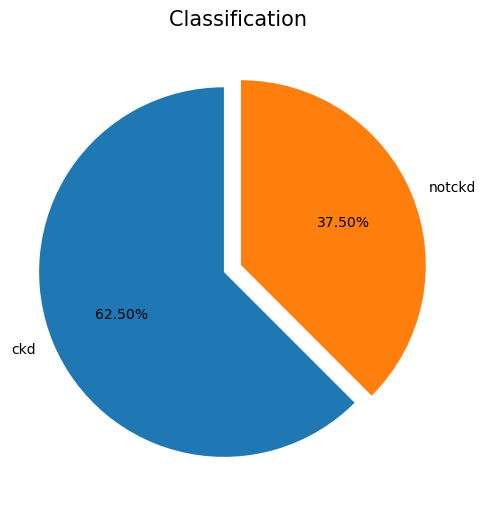

In [23]:
attr=df['Class'].value_counts()
fig,ax=plt.subplots(figsize=(14,6))
ax.pie(attr,explode=(0.1,0),labels=attr.index,autopct='%.2f%%',startangle=90)
ax.set_title("Classification ",fontsize=15)
plt.show()

<strong>Numerical Features</strong>

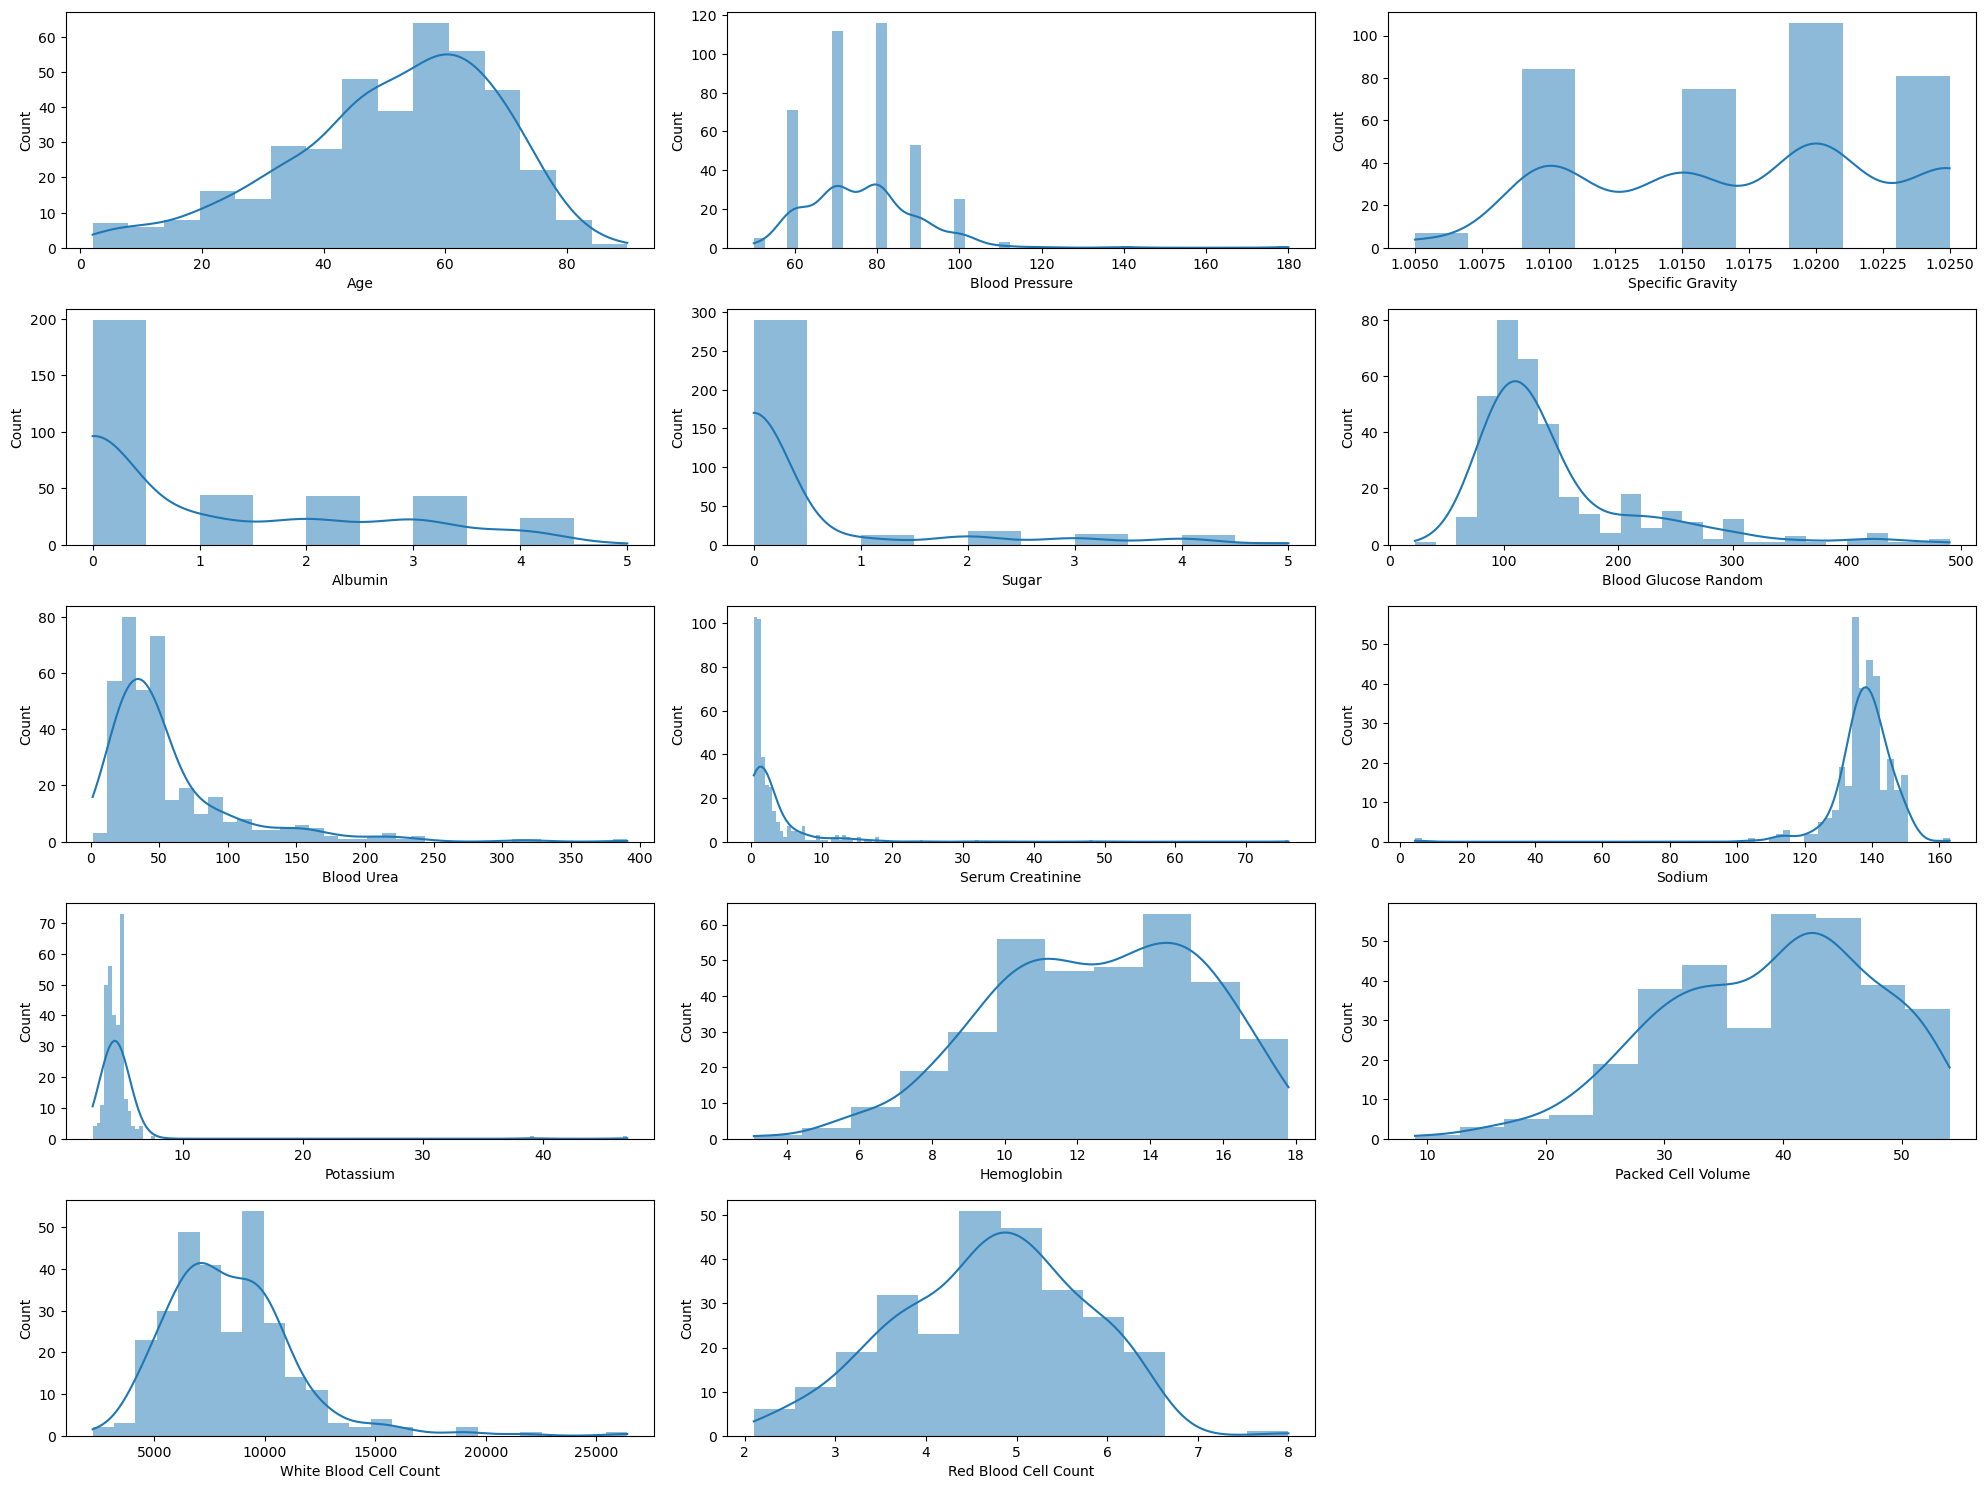

In [24]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in num_cols:
    ax = plt.subplot(5,3,plotnumber)
    sns.histplot(df[column],kde=True, stat="count", linewidth=0)
    plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show() 

<strong>Categorical Features</strong>

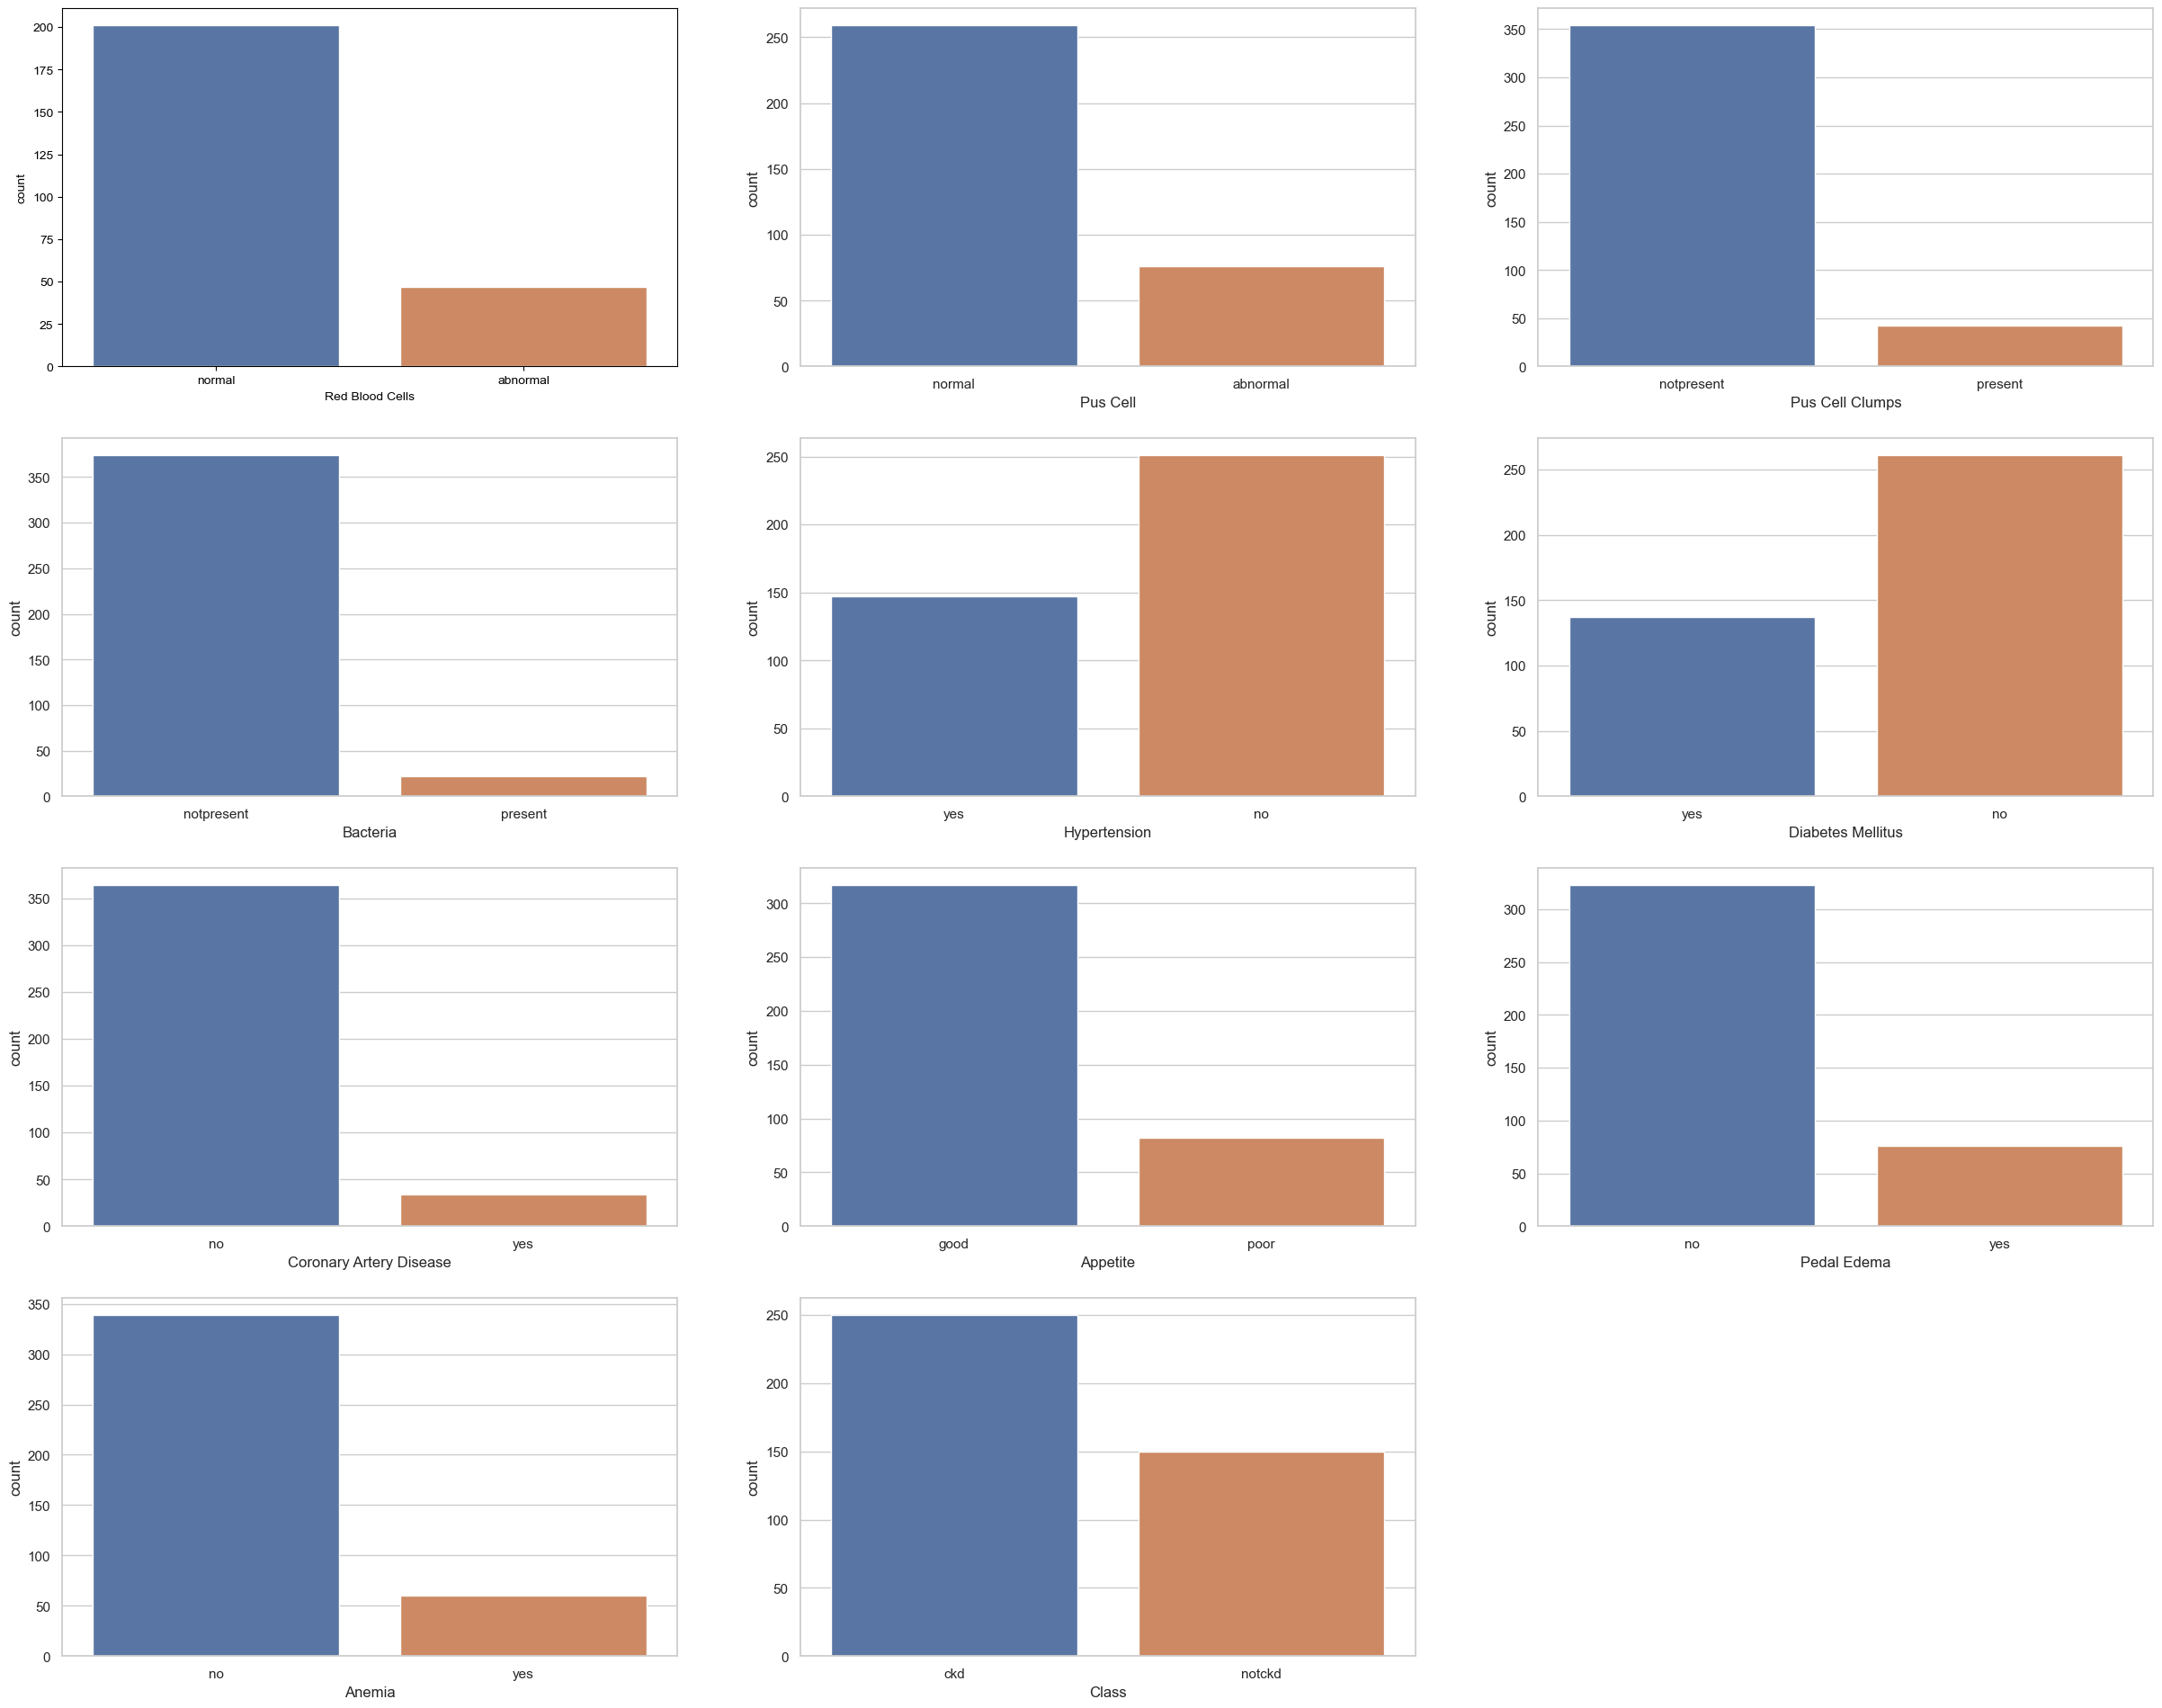

In [25]:
plt.figure(figsize=(30,30))
for i,feature in enumerate(cat_cols):
    plt.subplot(5,3,i+1)
    sns.set_theme(style="whitegrid")
    sns.countplot(x=df[feature])
plt.show()

<strong>Correlation Matrix</strong>

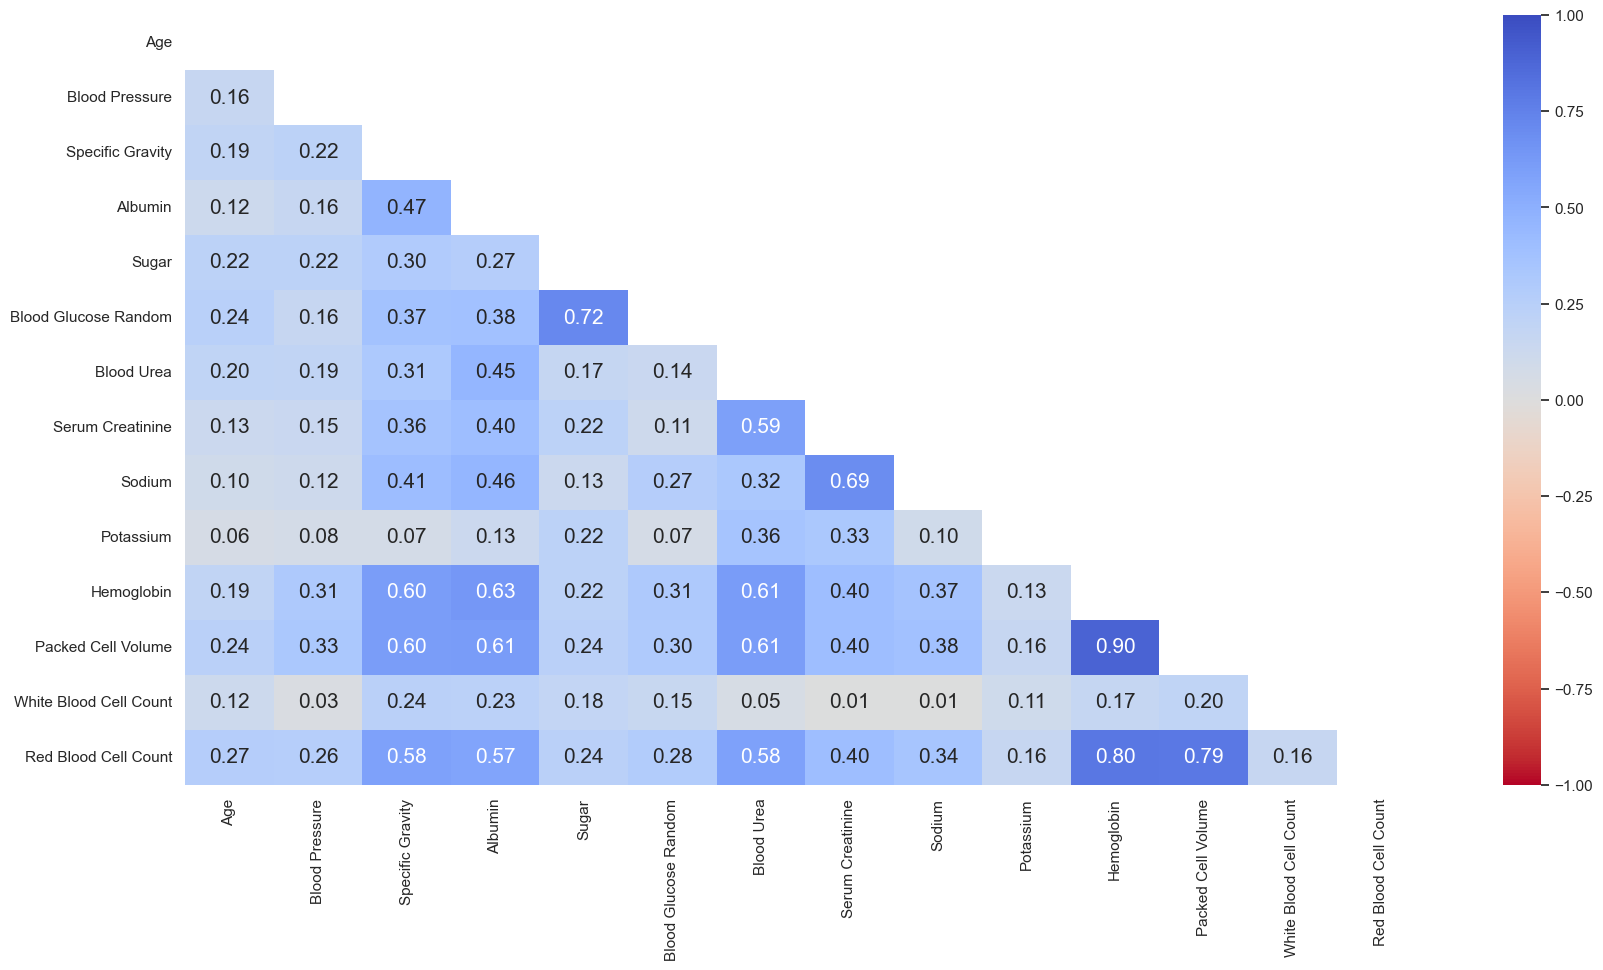

In [26]:
corr_matrix = df[num_cols].corr().abs()
corr_matrix_tri = corr_matrix.where(np.tril(np.ones(corr_matrix.shape),k=-1).astype(bool))
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix_tri, cmap='coolwarm_r', annot_kws={'fontsize':15}, fmt=".2f", annot=True, vmin=-1, vmax=1)
plt.show()

# Data Cleaning

<strong>1. Highly Correlated Features</strong>

In [27]:
to_drop = [column for column in corr_matrix_tri.columns if any(corr_matrix_tri[column] > 0.7)]
to_drop

['Sugar', 'Hemoglobin', 'Packed Cell Volume']

We are now removing these columns from our dataframe

In [28]:
df.drop(to_drop, axis=1, inplace=True)
num_cols = [col for col in num_cols if col not in to_drop]
cat_cols = [col for col in cat_cols if col not in to_drop]
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'White Blood Cell Count', 'Red Blood Cell Count',
       'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
       'Appetite', 'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

<strong>2. Outliers</strong>

<strong>Here, we have a small dataset therefore we cannot remove the outliers</strong><br/>
We will just visualize their occurence

In [29]:
fig = px.box(df[num_cols], y=num_cols[:-2])
fig.show()

<strong>3. Missing Values</strong>

In [30]:
# Detecting missing values
df.isnull().sum()

Age                          9
Blood Pressure              12
Specific Gravity            47
Albumin                     46
Red Blood Cells            152
Pus Cell                    65
Pus Cell Clumps              4
Bacteria                     4
Blood Glucose Random        44
Blood Urea                  19
Serum Creatinine            17
Sodium                      87
Potassium                   88
White Blood Cell Count     106
Red Blood Cell Count       131
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
Class                        0
dtype: int64

In [31]:
# Replace missing values in numerical features with the mean value
for i in num_cols:
    df[i].fillna(df[i].mean(),inplace=True)

In [32]:
# Replace missing values in categorical features with the mode value
for i in cat_cols:
  df[i] = df[i].fillna(df[i].mode()[0])

In [33]:
# Verifying
df.isnull().sum().any()

False

In [34]:
for col in cat_cols:
    print(f'{col} has {df[col].nunique()} categories')

Red Blood Cells has 2 categories
Pus Cell has 2 categories
Pus Cell Clumps has 2 categories
Bacteria has 2 categories
Hypertension has 2 categories
Diabetes Mellitus has 2 categories
Coronary Artery Disease has 2 categories
Appetite has 2 categories
Pedal Edema has 2 categories
Anemia has 2 categories
Class has 2 categories


# Data Transformation

<strong>1. Data Scaling</strong>

The technique used to scale the numerical data depends on the type of its distribution. as we don't have a Gaussian distribution we'll use Normalization

In [35]:
for col in num_cols:
    df[col] = MinMaxScaler(feature_range=(0,1)).fit_transform(df[col].astype(float).values.reshape(-1, 1))

In [36]:
# Verification
df.head()

Age  Blood Pressure  Specific Gravity  Albumin Red Blood Cells  \
0  0.522727        0.230769              0.75      0.2          normal   
1  0.056818        0.000000              0.75      0.8          normal   
2  0.681818        0.230769              0.25      0.4          normal   
3  0.522727        0.153846              0.00      0.8          normal   
4  0.556818        0.230769              0.25      0.4          normal   

   Pus Cell Pus Cell Clumps    Bacteria  Blood Glucose Random  Blood Urea  \
0    normal      notpresent  notpresent              0.211538    0.088575   
1    normal      notpresent  notpresent              0.269309    0.042362   
2    normal      notpresent  notpresent              0.856838    0.132221   
3  abnormal         present  notpresent              0.202991    0.139923   
4    normal      notpresent  notpresent              0.179487    0.062901   

   ...  Potassium  White Blood Cell Count  Red Blood Cell Count  Hypertension  \
0  ...   0.047803                0.231405              0.525424           yes   
1  ...   0.047803                0.157025              0.441938            no   
2  ...   0.047803                0.219008              0.441938            no   
3  ...   0.000000                0.185950              0.305085           yes   
4  ...   0.047803                0.210744              0.423729            no   

   Diabetes Mellitus Coronary Artery Disease Appetite Pedal Edema Anemia Class  
0                yes                      no     good          no     no   ckd  
1                 no                      no     good          no     no   ckd  
2                yes                      no     poor          no    yes   ckd  
3                 no                      no     poor         yes    yes   ckd  
4                 no                      no     good          no     no   ckd  

[5 rows x 22 columns]

<strong>2. Encoding Categorical Features</strong>

As we have only 2 possible values for each categorical feature, we can use Label Encoding

In [37]:
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

In [38]:
# Verifying
df.dtypes

Age                        float64
Blood Pressure             float64
Specific Gravity           float64
Albumin                    float64
Red Blood Cells              int32
Pus Cell                     int32
Pus Cell Clumps              int32
Bacteria                     int32
Blood Glucose Random       float64
Blood Urea                 float64
Serum Creatinine           float64
Sodium                     float64
Potassium                  float64
White Blood Cell Count     float64
Red Blood Cell Count       float64
Hypertension                 int32
Diabetes Mellitus            int32
Coronary Artery Disease      int32
Appetite                     int32
Pedal Edema                  int32
Anemia                       int32
Class                        int32
dtype: object

# Feature Selection

In [39]:
# Separating target data from independent data
X = df[[col for col in df.columns if col!='Class']]
y = df['Class']

### CFS

In [40]:
# CFS
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label):
    k = len(subset)

    # average feature-class correlation
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( df[label], df[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = df[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [41]:
# Find best feature
best_value = -1
best_feature = ''
for feature in X.columns:
    coeff = pointbiserialr( df['Class'], df[feature] )
    abs_coeff = abs( coeff.correlation )
    if abs_coeff > best_value:
        best_value = abs_coeff
        best_feature = feature

print("Feature %s with merit %.4f"%(best_feature, best_value))

Feature Specific Gravity with merit 0.6990


In [42]:
# Define datastructure and initialize for holding values
class PriorityQueue:
    def  __init__(self):
        self.queue = []

    def isEmpty(self):
        return len(self.queue) == 0
    
    def push(self, item, priority):
        """
        item already in priority queue with smaller priority:
        -> update its priority
        item already in priority queue with higher priority:
        -> do nothing
        if item not in priority queue:
        -> push it
        """
        for index, (i, p) in enumerate(self.queue):
            if (set(i) == set(item)):
                if (p >= priority):
                    break
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            self.queue.append( (item, priority) )
        
    def pop(self):
        # return item with highest priority and remove it from queue
        max_idx = 0
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)

# initialize queue
queue = PriorityQueue()

# push first tuple (subset, merit)
queue.push([best_feature], best_value)

# list for visited nodes
visited = []

# counter for backtracks
n_backtrack = 0

# limit of backtracks
max_backtrack = 5

In [43]:
# Fill the queue
# repeat until queue is empty
# or the maximum number of backtracks is reached
while not queue.isEmpty():
    # get element of queue with highest merit
    subset, priority = queue.pop()
    
    # check whether the priority of this subset
    # is higher than the current best subset
    if (priority < best_value):
        n_backtrack += 1
    else:
        best_value = priority
        best_subset = subset

    # goal condition
    if (n_backtrack == max_backtrack):
        break
    
    # iterate through all features and look of one can
    # increase the merit
    for feature in X.columns:
        temp_subset = subset + [feature]
        
        # check if this subset has already been evaluated
        for node in visited:
            if (set(node) == set(temp_subset)):
                break
        # if not, ...
        else:
            # ... mark it as visited
            visited.append(temp_subset)
            # ... compute merit
            merit = getMerit(temp_subset, 'Class')
            # and push it to the queue
            queue.push(temp_subset, merit)
else:
    print(f"best features: {subset} with priority {priority}")

In [44]:
# Validation
from sklearn.model_selection import cross_val_score
from sklearn import svm
import time

# predictors
#X = df_data[X.columns].to_numpy()
# target
#Y = df_data['class'].to_numpy()

# get timing
t0 = time.time()

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=100, gamma=0.01, random_state=42)
scores = cross_val_score(svc, X, y, cv=10)
best_score = np.mean(scores)

print("Score: %.2f%% (Time: %.4f s)"%(best_score*100, time.time() - t0))

# predictors
X_cfs = df[best_subset].to_numpy()

# get timing
t0 = time.time()

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=100, gamma=0.01, random_state=42)
scores_subset = cross_val_score(svc, X_cfs, y, cv=10)
best_score = np.mean( scores_subset )

print("Score: %.2f%% (Time: %.4f s)"%(best_score*100, time.time() - t0))

Score: 97.50% (Time: 0.1379 s)
Score: 96.50% (Time: 0.0891 s)


In [45]:
print(subset)

['Specific Gravity', 'Hypertension', 'Albumin', 'Red Blood Cell Count', 'Diabetes Mellitus', 'Sodium']


In [46]:
X = df[[col for col in subset]]

### RFE

In [47]:
# RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE

model = ExtraTreesClassifier()
rfe = RFE(model, n_features_to_select=10)

X_rfe = rfe.fit_transform(X,y)
model.fit(X_rfe, y)
impor_feat = X.columns[rfe.support_]
print(X.columns[rfe.support_])
print(rfe.ranking_)

Index(['Specific Gravity', 'Hypertension', 'Albumin', 'Red Blood Cell Count',
       'Diabetes Mellitus', 'Sodium'],
      dtype='object')
[1 1 1 1 1 1]


In [48]:
X = df[[col for col in impor_feat]]

### SelectKBest CHI2

In [49]:
# Importing libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Calculate scores
imp_features=SelectKBest(score_func=chi2,k='all').fit(X,y)

In [50]:
# Display columns with scores
features_rank = pd.concat([
    pd.DataFrame(X.columns),
    pd.DataFrame(imp_features.scores_,columns=['Score'])
    ], axis=1)
features_rank.columns = ['feature', 'score']
features_rank.nlargest(10, 'score')

feature      score
1          Hypertension  88.200000
4     Diabetes Mellitus  82.200000
2               Albumin  45.613559
0      Specific Gravity  22.646074
3  Red Blood Cell Count   6.394972
5                Sodium   0.187828

In [51]:
X = df[[col for col in features_rank.nlargest(6, 'score')['feature']]]

# Modeling

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [53]:
# Checking train test size
len(X_train), len(X_test), len(y_train), len(y_test)

(280, 120, 280, 120)

In [54]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### kNN

Text(0, 0.5, 'Score')

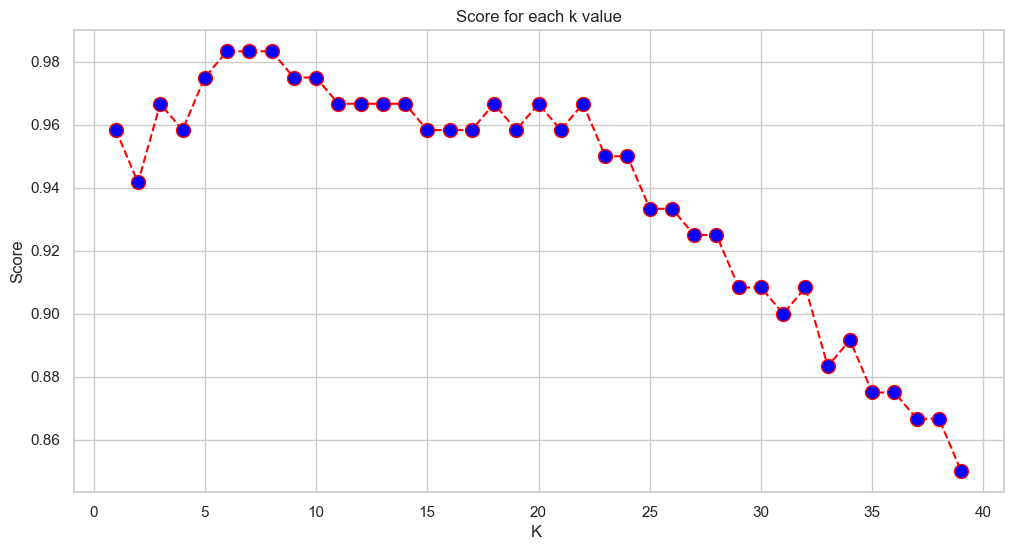

In [55]:
from sklearn.neighbors import KNeighborsClassifier
score = []
# Calculate score for k between 1 and 40 

for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    scores = cross_val_score(
    knn, X_test, y_test, cv=10, scoring='accuracy')
    score.append(np.mean(scores))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score for each k value')
plt.xlabel('K ')
plt.ylabel('Score')

We will take k=22

In [56]:
knn = KNeighborsClassifier(n_neighbors=6, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
knn.score(X_test, y_test)

0.9666666666666667

Evaluation (kNN)

In [57]:
acc_knn = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", acc_knn)

r2_knn = metrics.r2_score(y_test,y_pred)
print(f"R2 = {r2_knn}")
#if r2>0.5 donc c'est un bon modèle

Training Accuracy: 0.9785714285714285
R2 = 0.8611111111111112


In [58]:
print("Test cross-validation Accuracy:", np.mean(cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')))

Test cross-validation Accuracy: 0.9833333333333332


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



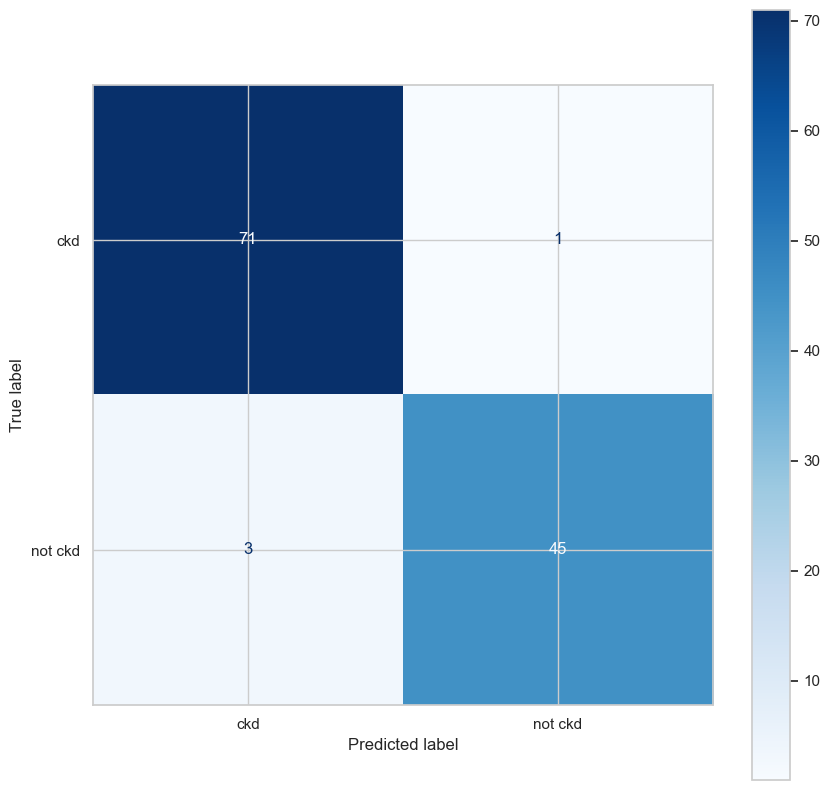

In [60]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ckd', 'not ckd'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

#### LogisticRegression

In [61]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)
reg.score(X_test, y_test)

0.9583333333333334

Evaluation (Logistic Regression)

In [62]:
acc_lr = accuracy_score(y_test, y_pred)
print("Training Accuracy:", acc_lr)

r2_lr = metrics.r2_score(y_test,y_pred)
print(f"R2 = {r2_lr}")
#if r2>0.5 donc c'est un bon modèle

Training Accuracy: 0.9583333333333334
R2 = 0.826388888888889


In [63]:
print("Test cross-validation Accuracy:", np.mean(cross_val_score(reg, X_test, y_test, cv=10, scoring='accuracy')))

Test cross-validation Accuracy: 0.9833333333333332


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.96      0.94      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



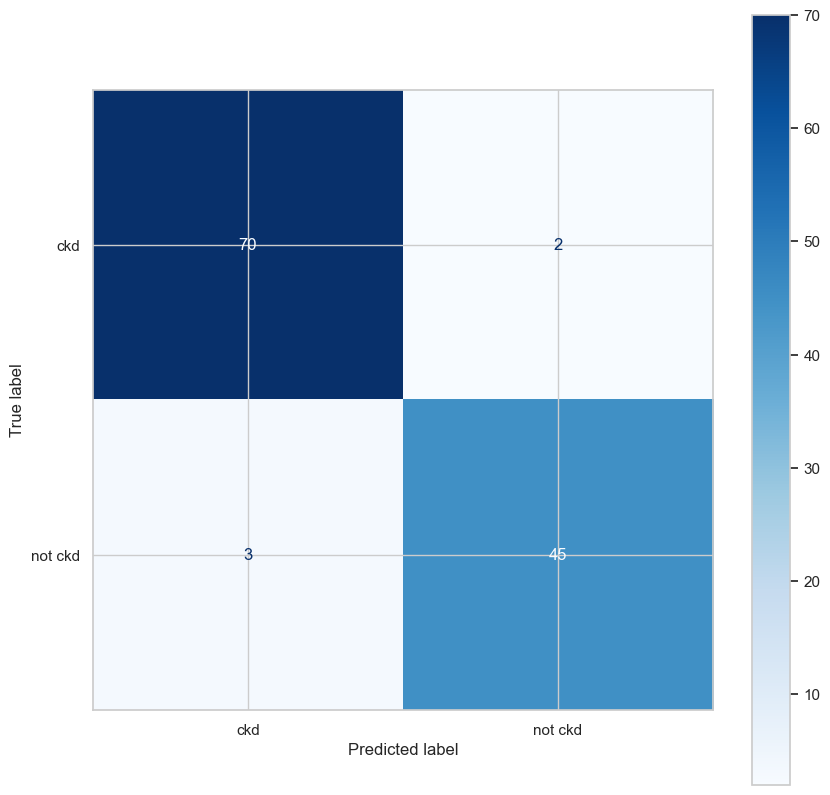

In [65]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ckd', 'not ckd'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

#### Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)
gnb.score(X_test, y_test)

0.9083333333333333

Evaluation (Naive Bayes)

In [67]:
acc_gnb = accuracy_score(y_test, y_pred)
print("Training Accuracy:", acc_gnb)


r2_gnb = metrics.r2_score(y_test,y_pred)
print(f"R2 = {r2_gnb}")

Training Accuracy: 0.9083333333333333
R2 = 0.6180555555555556


In [68]:
print("Test cross-validation Accuracy:", np.mean(cross_val_score(gnb, X_test, y_test, cv=10, scoring='accuracy')))

Test cross-validation Accuracy: 0.9083333333333334


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        72
           1       0.86      0.92      0.89        48

    accuracy                           0.91       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



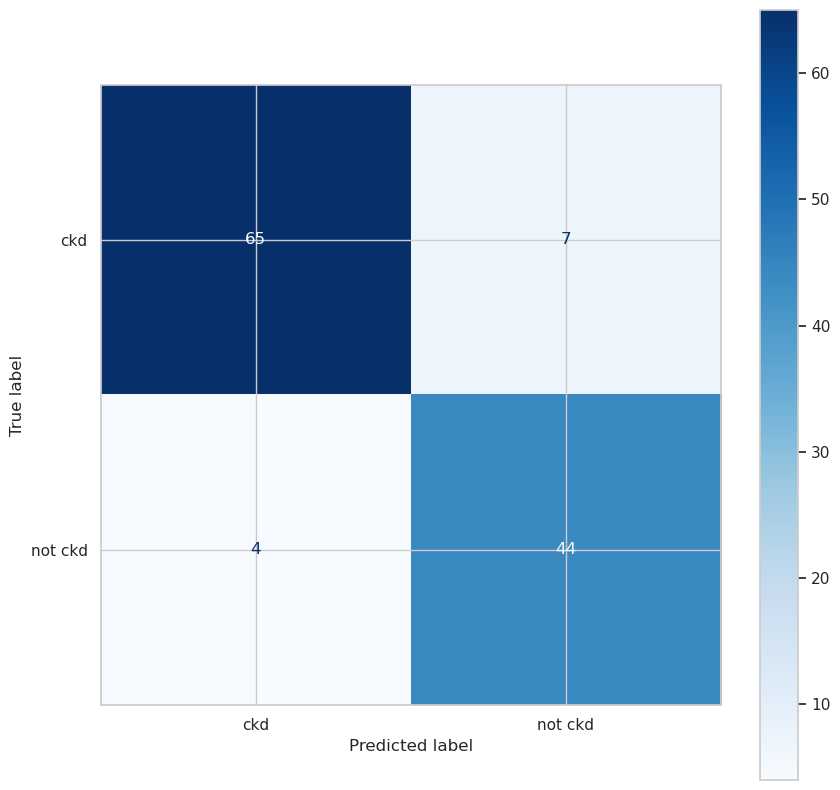

In [70]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ckd', 'not ckd'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

#### Catboost

In [67]:
!pip install catboost

     -------------------------------------- 74.0/74.0 MB 287.3 kB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00


In [68]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    loss_function='CrossEntropy'
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
clf.score(X_test, y_test)

0:	learn: 0.6388529	total: 122ms	remaining: 488ms
1:	learn: 0.5875981	total: 124ms	remaining: 186ms
2:	learn: 0.5439672	total: 126ms	remaining: 83.7ms
3:	learn: 0.5015096	total: 127ms	remaining: 31.7ms
4:	learn: 0.4707117	total: 128ms	remaining: 0us


0.95

Evaluation (CatBoost)

In [73]:
acc_clf = accuracy_score(y_test, y_pred)
print("Training Accuracy:", acc_clf)

r2_clf = metrics.r2_score(y_test,y_pred)
print(f"R2 = {r2_clf}")

Training Accuracy: 0.95
R2 = 0.7916666666666667


In [74]:
print("Test cross-validation Accuracy:", np.mean(cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')))

0:	learn: 0.6504315	total: 517us	remaining: 2.07ms
1:	learn: 0.6157490	total: 1.09ms	remaining: 1.63ms
2:	learn: 0.5788784	total: 1.31ms	remaining: 873us
3:	learn: 0.5420919	total: 1.52ms	remaining: 379us
4:	learn: 0.5143212	total: 1.76ms	remaining: 0us
0:	learn: 0.6510008	total: 336us	remaining: 1.34ms
1:	learn: 0.6085847	total: 892us	remaining: 1.34ms
2:	learn: 0.5720361	total: 1.1ms	remaining: 735us
3:	learn: 0.5368540	total: 1.27ms	remaining: 317us
4:	learn: 0.5105591	total: 1.54ms	remaining: 0us
0:	learn: 0.6516092	total: 346us	remaining: 1.38ms
1:	learn: 0.6089824	total: 888us	remaining: 1.33ms
2:	learn: 0.5730158	total: 1.14ms	remaining: 759us
3:	learn: 0.5379790	total: 1.34ms	remaining: 334us
4:	learn: 0.5128367	total: 1.51ms	remaining: 0us
0:	learn: 0.6491289	total: 478us	remaining: 1.91ms
1:	learn: 0.6069234	total: 1.15ms	remaining: 1.72ms
2:	learn: 0.5709375	total: 1.39ms	remaining: 926us
3:	learn: 0.5398743	total: 1.65ms	remaining: 412us
4:	learn: 0.5135654	total: 1.81ms	re

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.96      0.92      0.94        48

    accuracy                           0.95       120
   macro avg       0.95      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



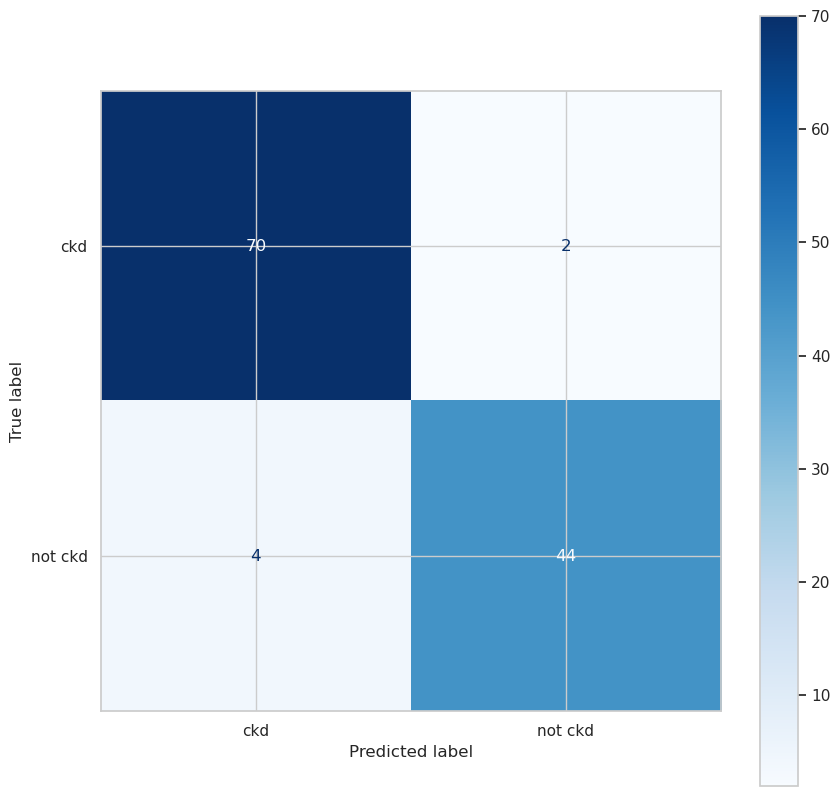

In [76]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ckd', 'not ckd'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

#### RandomForest

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
y_pred_train = rf.predict(X_train)
rf.score(X_test, y_test)

0.975

Evaluation (Random Forest)

In [78]:
acc_rf = accuracy_score(y_test, y_pred)
print("Training Accuracy:", acc_rf)

r2_rf = metrics.r2_score(y_test,y_pred)
print(f"R2 = {r2_rf}")

Training Accuracy: 0.975
R2 = 0.8958333333333334


In [79]:
print("Test cross-validation Accuracy:", np.mean(cross_val_score(rf, X_test, y_test, cv=10, scoring='accuracy')))

Test cross-validation Accuracy: 0.9666666666666666


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



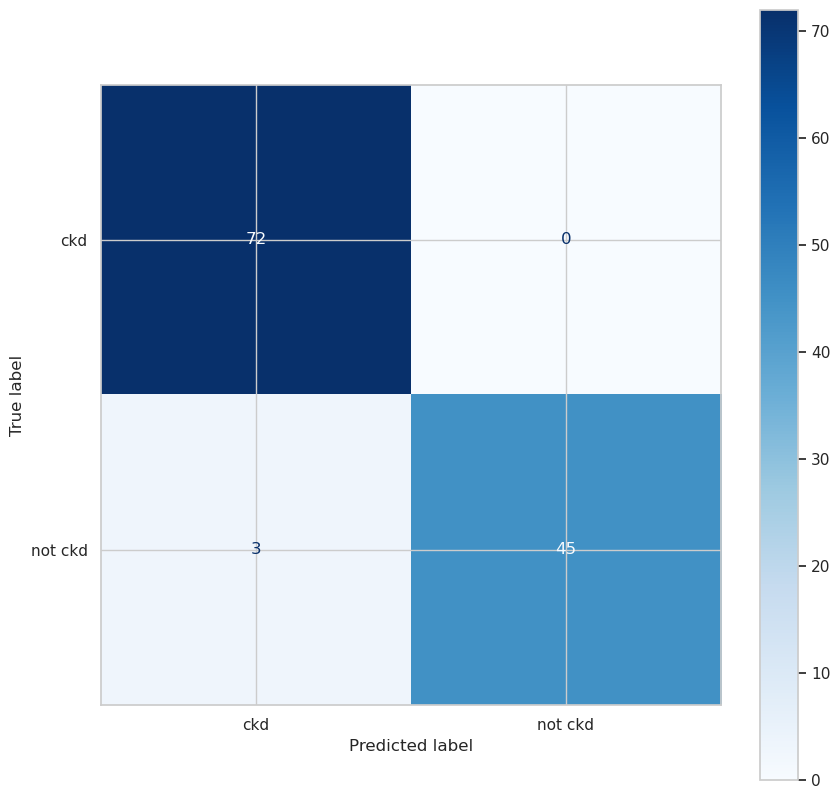

In [81]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ckd', 'not ckd'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

#### DecisionTree


In [82]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)
y_pred_train = dt.predict(X_train)
dt.score(X_test, y_test)

0.9666666666666667

Evaluation (Decision Tree)

In [83]:
acc_dt = accuracy_score(y_test, y_pred)
print("Training Accuracy:", acc_dt)

r2_dt = metrics.r2_score(y_test,y_pred)
print(f"R2 = {r2_dt}")

Training Accuracy: 0.9666666666666667
R2 = 0.8611111111111112


In [84]:
print("Test cross-validation Accuracy:", np.mean(cross_val_score(dt, X_test, y_test, cv=10, scoring='accuracy')))

Test cross-validation Accuracy: 0.9833333333333332


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



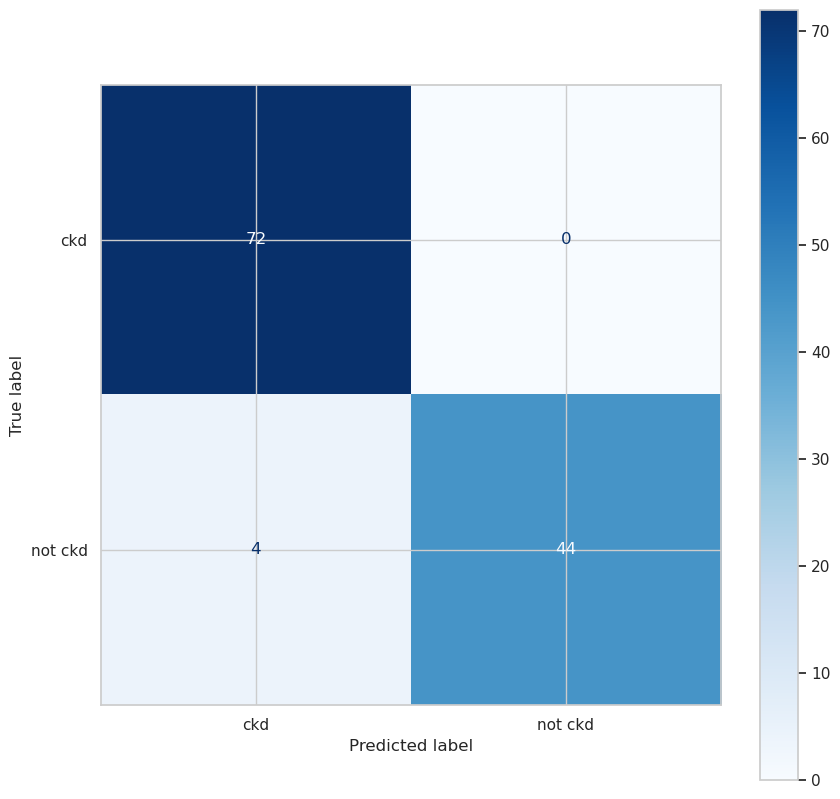

In [86]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ckd', 'not ckd'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

#### SVM

##### SVM without kernel

In [87]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)
y_pred= svc.predict(X_test)
y_pred_train = svc.predict(X_train)

svc.score(X_test, y_test)

0.95

Evaluation (SVM without kernel)

In [88]:
acc_svc = accuracy_score(y_test, y_pred)
print("Training Accuracy:", acc_svc)

r2_svc = metrics.r2_score(y_test,y_pred)
print(f"R2 = {r2_svc}")

Training Accuracy: 0.95
R2 = 0.7916666666666667


In [89]:
print("Test cross-validation Accuracy:", np.mean(cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy')))

Test cross-validation Accuracy: 0.9833333333333332


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.96      0.92      0.94        48

    accuracy                           0.95       120
   macro avg       0.95      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



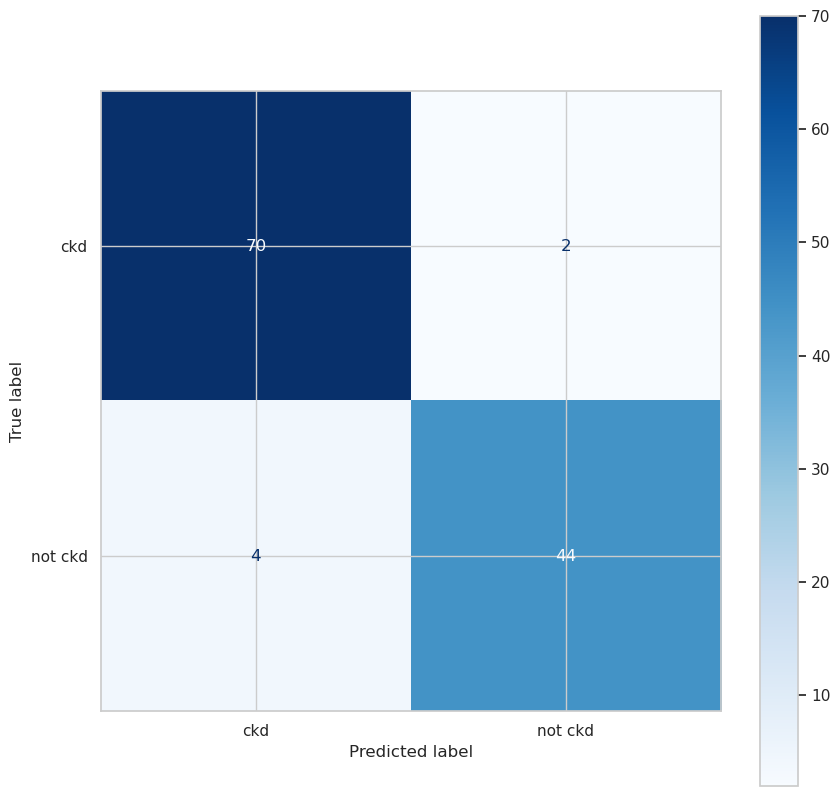

In [91]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ckd', 'not ckd'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

##### SVM with rbf kernel

In [92]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf")

svc.fit(X_train, y_train)
y_pred= svc.predict(X_test)
y_pred_train = svc.predict(X_train)

svc.score(X_test, y_test)

0.95

Evaluation (SVM rbf)

In [93]:
acc_svc_rbf = accuracy_score(y_test, y_pred)
print("Training Accuracy:", acc_svc_rbf)

r2_svc_rbf = metrics.r2_score(y_test,y_pred)
print(f"R2 = {r2_svc_rbf}")

Training Accuracy: 0.95
R2 = 0.7916666666666667


In [94]:
print("Test cross-validation Accuracy:", np.mean(cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy')))

Test cross-validation Accuracy: 0.9833333333333332


In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.96      0.92      0.94        48

    accuracy                           0.95       120
   macro avg       0.95      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



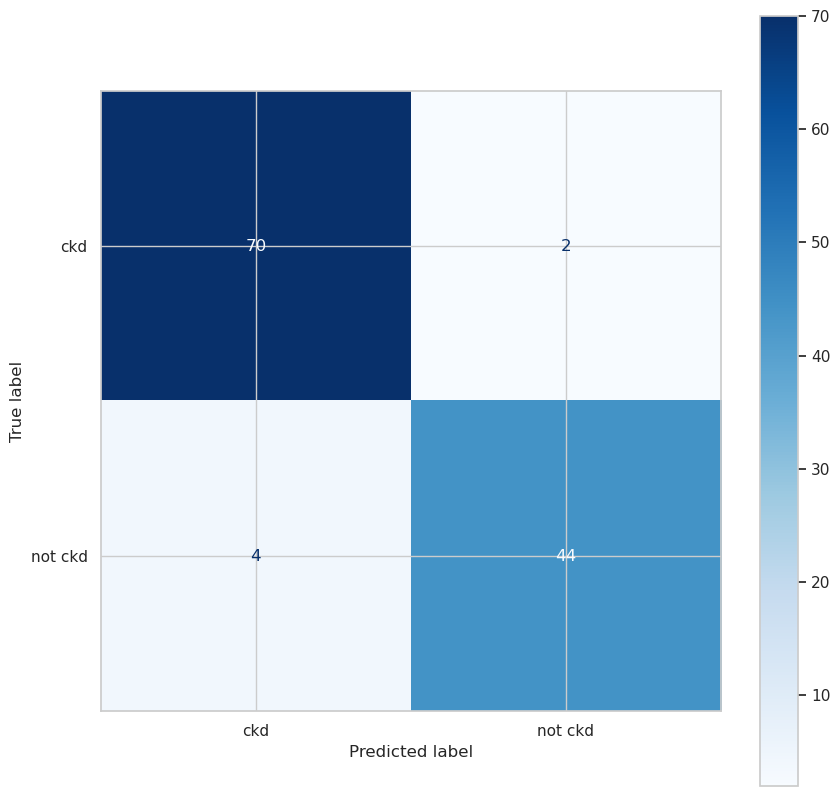

In [96]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ckd', 'not ckd'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

##### SVM with sigmoid kernel

In [97]:
from sklearn.svm import SVC

svc = SVC(kernel="sigmoid")

svc.fit(X_train, y_train)
y_pred= svc.predict(X_test)
y_pred_train = svc.predict(X_train)

svc.score(X_test, y_test)

0.8833333333333333

Evaluation (SVM sigmoid)

In [98]:
acc_svc_sig = accuracy_score(y_test, y_pred)
print("Training Accuracy:", acc_svc_sig)

r2_svc_sig = metrics.r2_score(y_test,y_pred)
print(f"R2 = {r2_svc_sig}")

Training Accuracy: 0.8833333333333333
R2 = 0.513888888888889


In [99]:
print("Test cross-validation Accuracy:", np.mean(cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy')))

Test cross-validation Accuracy: 0.8416666666666666


In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        72
           1       0.80      0.94      0.87        48

    accuracy                           0.88       120
   macro avg       0.88      0.89      0.88       120
weighted avg       0.89      0.88      0.88       120



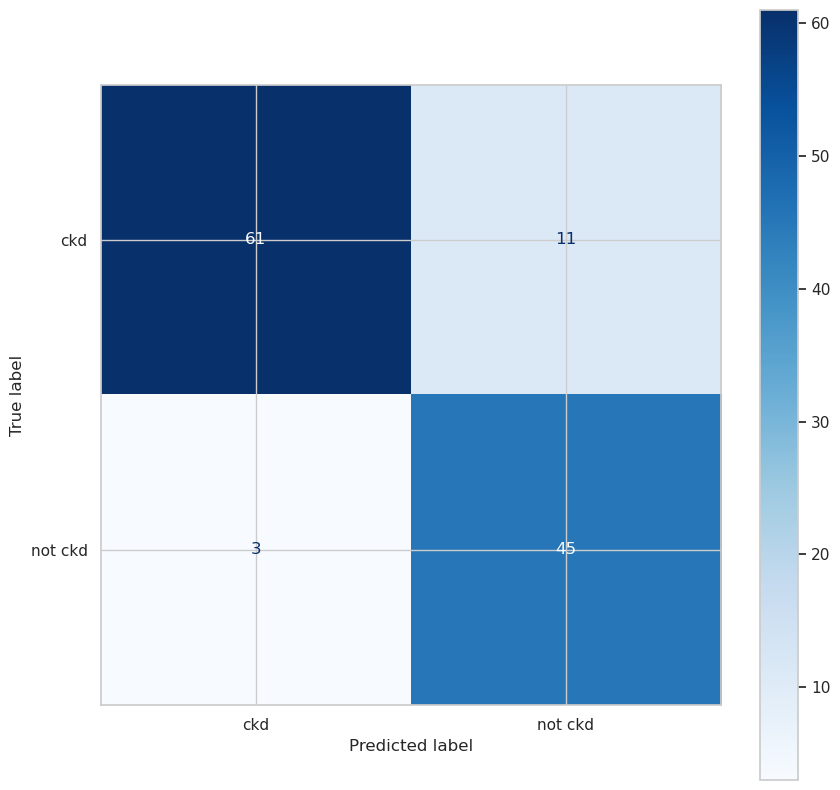

In [101]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ckd', 'not ckd'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

##### SVM with polynomial kernel

In [102]:
from sklearn.svm import SVC

svc = SVC(kernel="poly")

svc.fit(X_train, y_train)
y_pred= svc.predict(X_test)
y_pred_train = svc.predict(X_train)

svc.score(X_test, y_test)

0.9583333333333334

Evaluation (SVM Polynomial)

In [103]:
acc_svc_poly = accuracy_score(y_test, y_pred)
print("Training Accuracy:", acc_svc_poly)

r2_svc_poly = metrics.r2_score(y_test,y_pred)
print(f"R2 = {r2_svc_poly}")

Training Accuracy: 0.9583333333333334
R2 = 0.826388888888889


In [104]:
print("Test cross-validation Accuracy:", np.mean(cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy')))

Test cross-validation Accuracy: 0.9666666666666666


In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.96      0.94      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



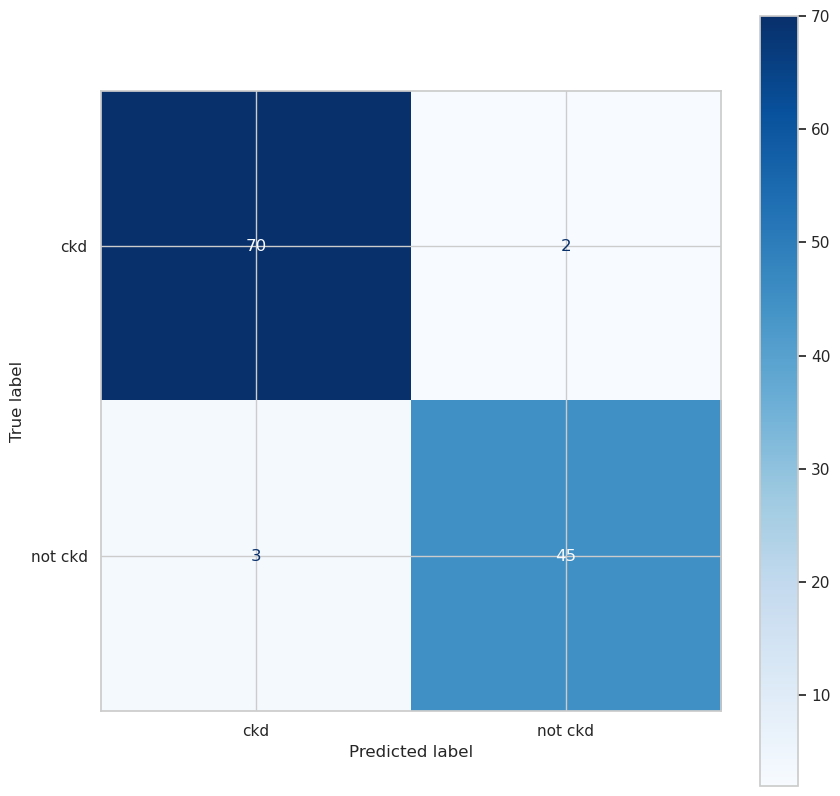

In [106]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ckd', 'not ckd'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

##### SVM with linear kernel

In [107]:
from sklearn.svm import SVC

svc = SVC(kernel="linear")

svc.fit(X_train, y_train)
y_pred= svc.predict(X_test)
y_pred_train = svc.predict(X_train)

svc.score(X_test, y_test)

0.9583333333333334

Evaluation (SVM linear)

In [108]:
acc_svc_lin = accuracy_score(y_test, y_pred)
print("Training Accuracy:", acc_svc_lin)

r2_svc_lin = metrics.r2_score(y_test,y_pred)
print(f"R2 = {r2_svc_lin}")

Training Accuracy: 0.9583333333333334
R2 = 0.826388888888889


In [109]:
print("Test cross-validation Accuracy:", np.mean(cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy')))

Test cross-validation Accuracy: 0.9749999999999999


In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.96      0.94      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



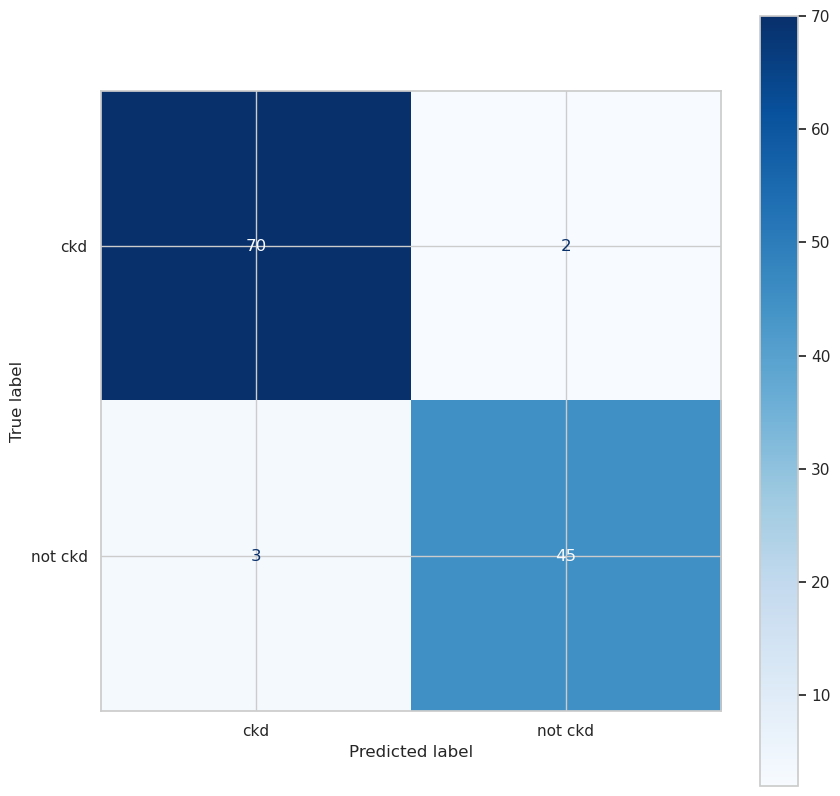

In [111]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ckd', 'not ckd'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

#### Ada Boost

In [112]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

abc.fit(X_train, y_train)
y_pred= abc.predict(X_test)
y_pred_train = abc.predict(X_train)

abc.score(X_test, y_test)

0.975

Evaluation (Ada Boost)

In [113]:
acc_ada = accuracy_score(y_test, y_pred)
print("Training Accuracy:", acc_ada)

r2_ada = metrics.r2_score(y_test,y_pred)
print(f"R2 = {r2_ada}")

Training Accuracy: 0.975
R2 = 0.8958333333333334


In [114]:
print("Test cross-validation Accuracy:", np.mean(cross_val_score(abc, X_test, y_test, cv=10, scoring='accuracy')))

Test cross-validation Accuracy: 0.9916666666666666


In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.96      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



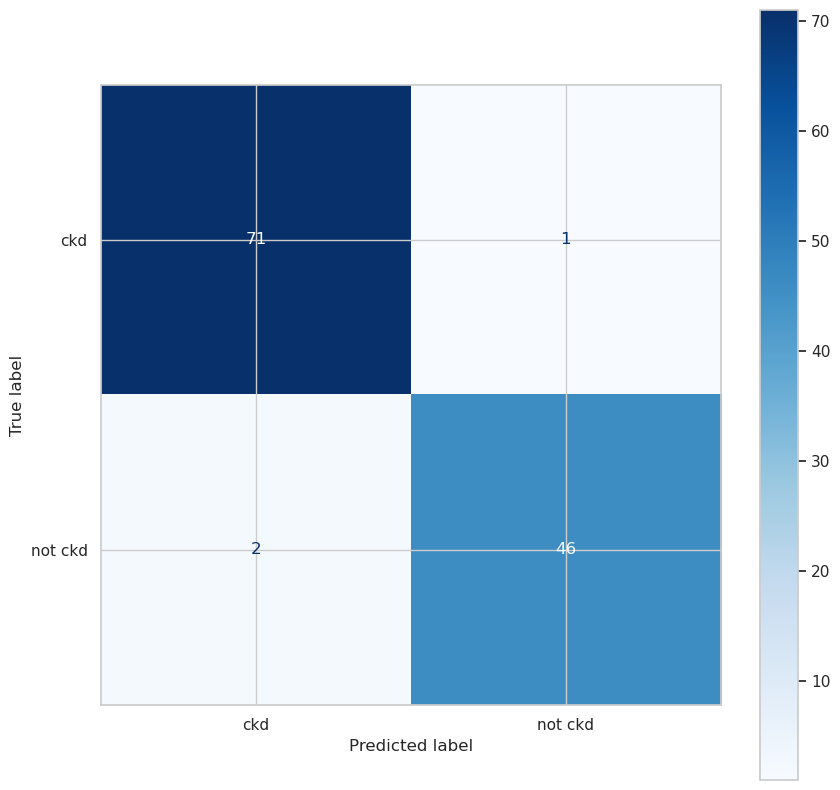

In [116]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ckd', 'not ckd'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

#### XGBoost

In [117]:
# Import
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
# Initialization
params={'learning-rate':[0,0.5,0.20,0.25],
        'max_depth':[5,8,10],
       'min_child_weight':[1,3,5,7],
       'gamma':[0.0,0.1,0.2,0.4],
       'colsample_bytree':[0.3,0.4,0.7]}
classifier=XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=1,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

random_search.fit(X_train,y_train)
y_pred= random_search.predict(X_test)
y_pred_train = random_search.predict(X_train)

random_search.score(X_test, y_test)

#model.fit(X_train, y_train)
## make predictions for test data
#y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
## evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[17:47:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learning-rate" } are not used.

[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning-rate=0, max_depth=8, min_child_weight=7;, score=1.000 total time=   0.1s
[17:47:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learning-rate" } are not used.

[17:47:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learning-rate" } are not used.

[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning-rate=0, max_depth=8, min_child_weight=7;, score=0.982 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning-rate=0, max_depth=8, min_child_weight=7;, score=1.000 total time=   0.1s
[17:47:33] WARNING: /home/conda/feedstock_root/build_artifacts/xg

0.9991319444444445

Evaluation (XGBoost)

In [118]:
acc_xgb = accuracy_score(y_test, y_pred)
print("Training Accuracy:", acc_xgb)

r2_xgb = metrics.r2_score(y_test,y_pred)
print(f"R2 = {r2_xgb}")

Training Accuracy: 0.975
R2 = 0.8958333333333334


In [119]:
print("Test cross-validation Accuracy:", np.mean(cross_val_score(abc, X_test, y_test, cv=10, scoring='accuracy')))

Test cross-validation Accuracy: 0.9916666666666666


In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.96      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



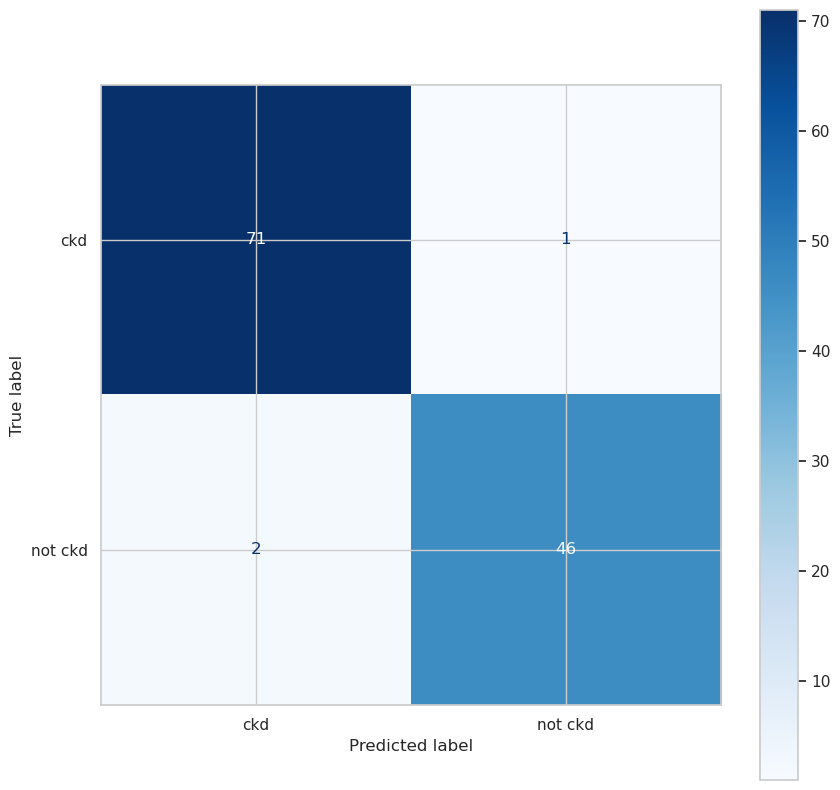

In [121]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ckd', 'not ckd'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)

### Evaluation (All Models)

In [122]:
models = pd.DataFrame({
    'Model' : [ 'KNN',"LogisticRegression"  , "Naive Bayes"  ,
               "Cat Boost","Random Forest","Decision Tree",
               "SVM No Kernel", "SVM rbf" , 'SVM sigmoid',
               'SVM polynomial','SVM Linear',
             'Ada Boost', 'XGBoost'],
    'Accuracy' : [acc_knn, acc_lr, acc_gnb,acc_clf,acc_rf,acc_dt,acc_svc, acc_svc_rbf, acc_svc_sig, acc_svc_poly,
               acc_svc_lin, acc_ada, acc_xgb],
    'R2' : [r2_knn, r2_lr, r2_gnb,r2_clf,r2_rf,r2_dt,r2_svc, r2_svc_rbf, r2_svc_sig, r2_svc_poly, r2_svc_lin, r2_ada, r2_xgb]
})

In [123]:
models_sorted = models.sort_values(by = 'Accuracy', ascending = True)
px.bar(data_frame = models_sorted, x = 'Accuracy', y = 'Model', color = 'Accuracy', template = 'plotly_dark', 
       title = 'Models Comparison')

In [124]:
models_sorted = models.sort_values(by = 'R2', ascending = True)
px.bar(data_frame = models_sorted, x = 'R2', y = 'Model', color = 'R2', template = 'plotly_dark', 
       title = 'Models Comparison')